In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys
sys.path.append('..')
import myd2l

epoch 10, perplexity 17.4
time traveller                                                  
epoch 20, perplexity 17.0
time traveller                                                  
epoch 30, perplexity 15.1
time travellereeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
epoch 40, perplexity 8.0
time travellereeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
epoch 50, perplexity 3.5
time travellereeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
epoch 60, perplexity 1.9
time travellerererrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr
epoch 70, perplexity 1.6
time travellerererererererererererererererererererererererererer
epoch 80, perplexity 1.4
time travellerererererererererererererererererererererererererer
epoch 90, perplexity 1.4
time travellerererererererererererererererererererererererererer
epoch 100, perplexity 1.3
time travellerererererererererererererererererererererererererer
epoch 110, perplexity 1.3
time travellerererererererererererererererererererererererererer
epoch

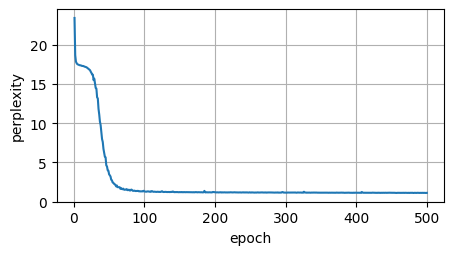

perplexity 1.1, 104975.1 examples/sec on cuda
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


In [2]:
class DeepLSTM(nn.Module):
    def __init__(self, vocab_size, num_hiddens, num_layers, bidirectional):
        super().__init__()
        self.vocab_size = vocab_size
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.lstm = nn.LSTM(vocab_size, num_hiddens, num_layers, bidirectional=bidirectional)
        self.fc = nn.Linear(num_hiddens * (2 if bidirectional else 1), vocab_size)
    
    def forward(self, X, state):
        X = F.one_hot(X.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.lstm(X, state)
        Y = self.fc(Y).reshape((-1, self.vocab_size))

        return Y, state

    def begin_state(self, batch_size, device):
        return (
            torch.zeros(size=(self.num_layers * (2 if self.bidirectional else 1), batch_size, self.num_hiddens), dtype=torch.float32, device=device),
            torch.zeros(size=(self.num_layers * (2 if self.bidirectional else 1), batch_size, self.num_hiddens), dtype=torch.float32, device=device)
        )
    
batch_size, num_steps = 32, 35
train_iter, vocab = myd2l.load_data_time_machine(batch_size, num_steps)

vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
net = DeepLSTM(vocab_size, num_hiddens, num_layers, True)

num_epochs, lr = 500, 1
device = torch.device('cuda')
myd2l.train_lm(net, train_iter, vocab, lr, num_epochs, device)